In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings

%config InlineBackend.rc = {'figure.figsize': (6, 6)}
warnings.filterwarnings("ignore")

In [133]:
df=pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")

In [134]:
df.shape

(101, 11)

In [135]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [137]:
new_columns = ['Time','Gender','Age','Course','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns=new_columns

In [138]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [139]:
df.isnull().sum()

Time          0
Gender        0
Age           1
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [140]:
df.dropna(inplace=True)

In [141]:
df.isnull().sum()

Time          0
Gender        0
Age           0
Course        0
Year          0
CGPA          0
Marriage      0
Depression    0
Anxiety       0
Panic         0
Treatment     0
dtype: int64

In [142]:
df.duplicated().sum()

0

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Time        100 non-null    object 
 1   Gender      100 non-null    object 
 2   Age         100 non-null    float64
 3   Course      100 non-null    object 
 4   Year        100 non-null    object 
 5   CGPA        100 non-null    object 
 6   Marriage    100 non-null    object 
 7   Depression  100 non-null    object 
 8   Anxiety     100 non-null    object 
 9   Panic       100 non-null    object 
 10  Treatment   100 non-null    object 
dtypes: float64(1), object(10)
memory usage: 9.4+ KB


In [144]:
new = df['Year'].str.split(' ',n=1,expand=True)
df['X'] = new[0]
df['Y'] = new[1]
df["Year"]=df['Y']
df=df.drop(columns=['X', 'Y'])

In [145]:
df.Year.unique()

array(['1', '2', '3', '4'], dtype=object)

In [146]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18.0,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [147]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [148]:
df["CGPA"]=df["CGPA"].str.strip(" ")

In [149]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [150]:
df.CGPA.unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [151]:
df['Age'] = df['Age'].astype(int)

In [152]:
df.head()

,Time,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [153]:
df.drop("Time",axis=1,inplace=True)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      100 non-null    object
 1   Age         100 non-null    int64 
 2   Course      100 non-null    object
 3   Year        100 non-null    object
 4   CGPA        100 non-null    object
 5   Marriage    100 non-null    object
 6   Depression  100 non-null    object
 7   Anxiety     100 non-null    object
 8   Panic       100 non-null    object
 9   Treatment   100 non-null    object
dtypes: int64(1), object(9)
memory usage: 8.6+ KB


In [155]:
df['Year'] = df['Year'].astype(int)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Gender      100 non-null    object
 1   Age         100 non-null    int64 
 2   Course      100 non-null    object
 3   Year        100 non-null    int64 
 4   CGPA        100 non-null    object
 5   Marriage    100 non-null    object
 6   Depression  100 non-null    object
 7   Anxiety     100 non-null    object
 8   Panic       100 non-null    object
 9   Treatment   100 non-null    object
dtypes: int64(2), object(8)
memory usage: 8.6+ KB


In [157]:
df.head()

,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No


In [158]:
df.Age.unique()

array([18, 21, 19, 22, 23, 20, 24])

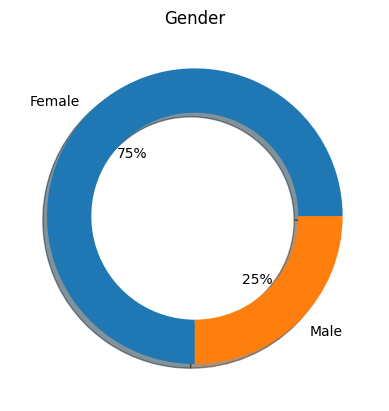

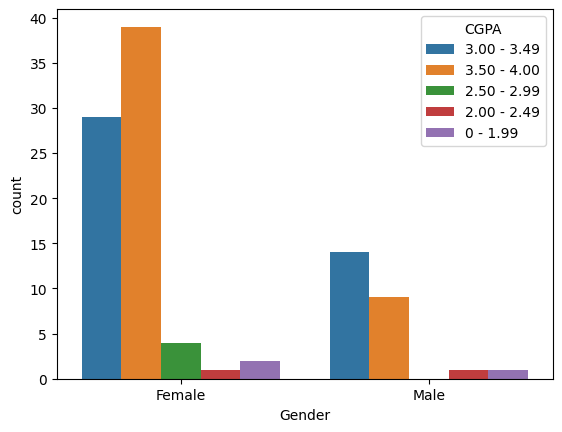

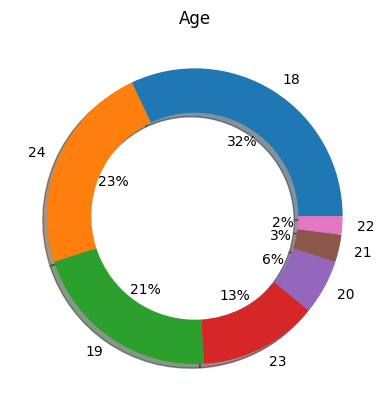

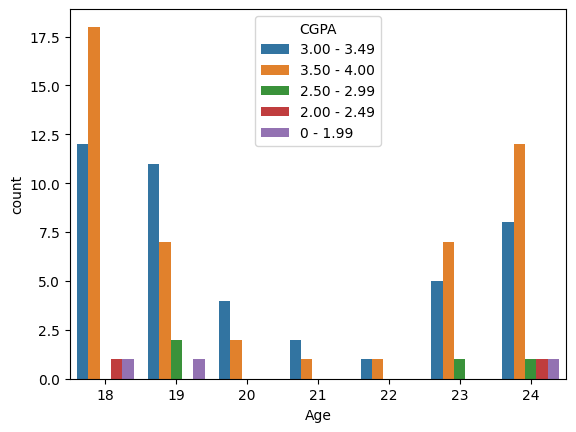

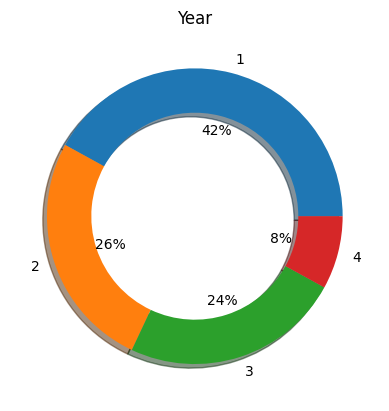

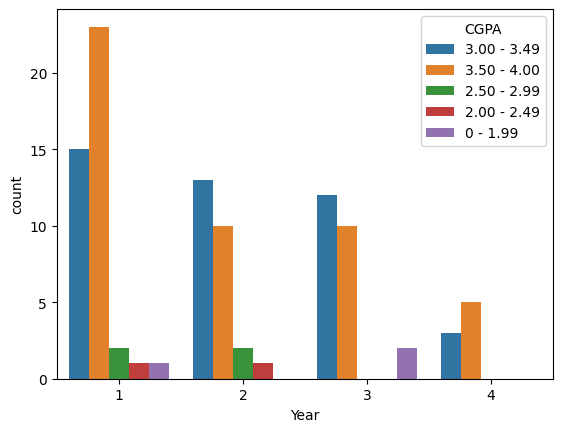

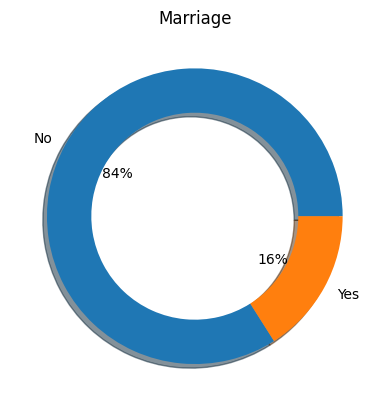

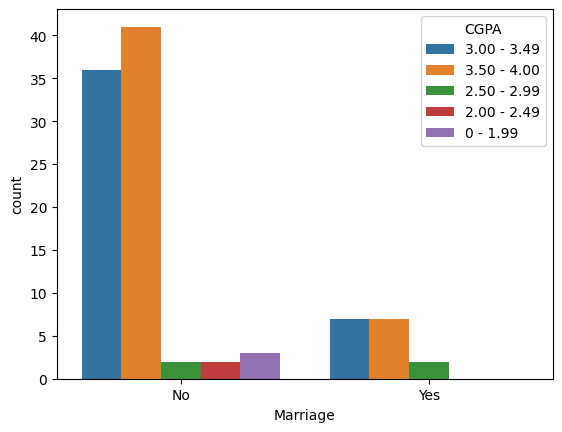

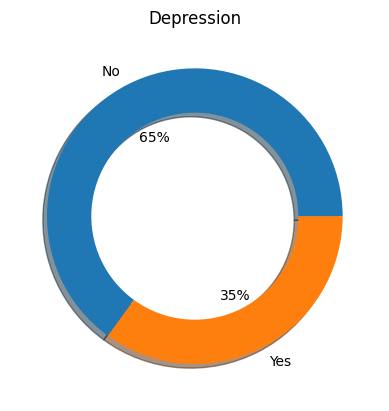

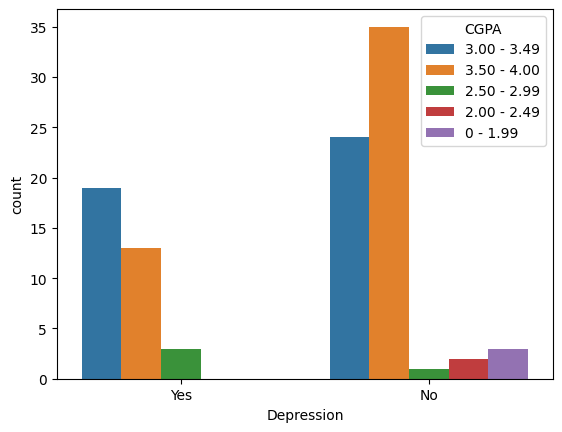

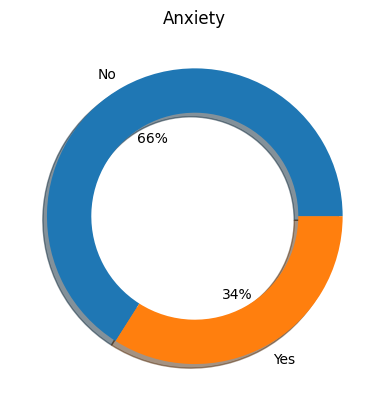

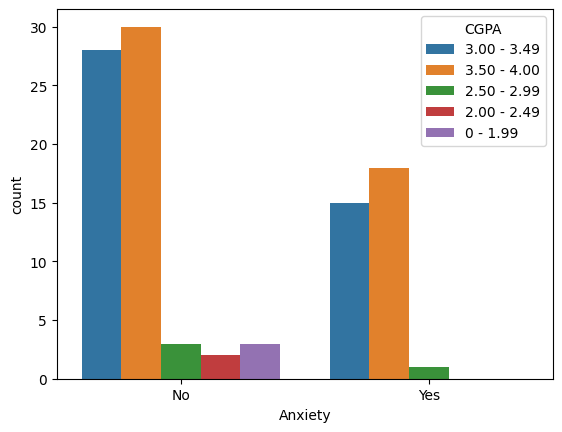

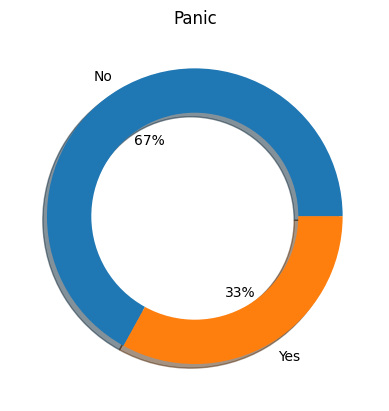

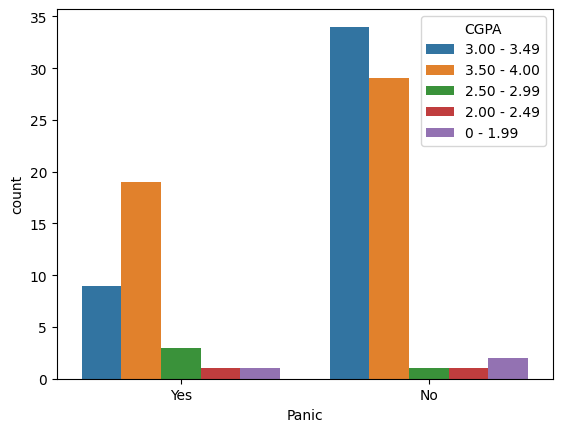

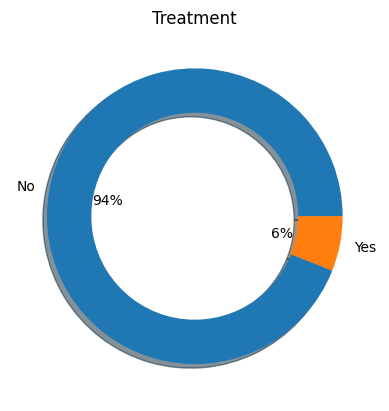

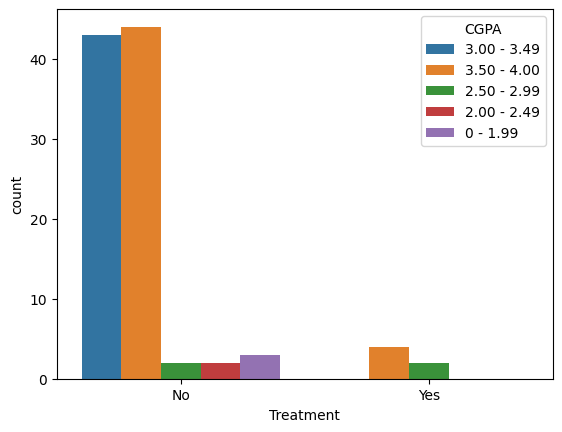

In [159]:
for i in ['Gender','Age','Year','Marriage','Depression','Anxiety','Panic','Treatment']:
    data = df[i].value_counts()
    plt.pie(data, labels=data.index,autopct='%.0f%%',shadow=True,wedgeprops={"width":0.3})
    plt.title(i)
    plt.show()
    sns.countplot(df, x=i, hue="CGPA")
    plt.show()

In [160]:
df.replace("0 - 1.99", "0",inplace=True)
df.replace('2.00 - 2.49', "1",inplace=True)
df.replace('2.50 - 2.99', "2",inplace=True)
df.replace('3.50 - 4.00', "3",inplace=True)
df.replace('3.00 - 3.49', "4",inplace=True)
df['CGPA'] = df['CGPA'].astype('category')

In [161]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == 'Female' else 1)
df['Gender'] = df['Gender'].astype('category')

In [162]:
for column in ['Marriage','Depression','Anxiety','Panic','Treatment']:
    df[column] = df[column].apply(lambda x: 0 if x == 'No' else 1)
    df[column] = df[column].astype('category')

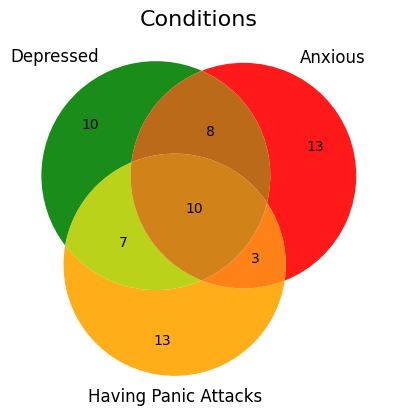

In [163]:
from matplotlib_venn import venn3
depressed = df[(df["Depression"] == 1)]
anxious = df[(df["Anxiety"] == 1)]
panicking = df[(df["Panic"] == 1)]

venn3(subsets = [set(depressed.index), 
                 set(anxious.index), 
                 set(panicking.index)], 
      set_labels = ("Depressed", "Anxious", "Having Panic Attacks"),
      set_colors = ("Green", "Red", "Orange"),
      alpha = 0.9)

plt.title("Conditions", fontsize = 16)
plt.show()

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Gender      100 non-null    category
 1   Age         100 non-null    int64   
 2   Course      100 non-null    object  
 3   Year        100 non-null    int64   
 4   CGPA        100 non-null    category
 5   Marriage    100 non-null    category
 6   Depression  100 non-null    category
 7   Anxiety     100 non-null    category
 8   Panic       100 non-null    category
 9   Treatment   100 non-null    category
dtypes: category(7), int64(2), object(1)
memory usage: 4.7+ KB


In [165]:
df.head()

,Gender,Age,Course,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment
0,0,18,Engineering,1,4,0,1,0,1,0
1,1,21,Islamic education,2,4,0,0,1,0,0
2,1,19,BIT,1,4,0,1,1,1,0
3,0,22,Laws,3,4,1,1,0,0,0
4,1,23,Mathemathics,4,4,0,0,0,0,0


In [166]:
df = pd.get_dummies(df, columns=['Course'])

In [167]:
df.shape

(100, 58)

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          100 non-null    category
 1   Age                             100 non-null    int64   
 2   Year                            100 non-null    int64   
 3   CGPA                            100 non-null    category
 4   Marriage                        100 non-null    category
 5   Depression                      100 non-null    category
 6   Anxiety                         100 non-null    category
 7   Panic                           100 non-null    category
 8   Treatment                       100 non-null    category
 9   Course_ALA                      100 non-null    bool    
 10  Course_Accounting               100 non-null    bool    
 11  Course_BCS                      100 non-null    bool    
 12  Course_BENL                

In [169]:
for i in df.iloc[:,9:]:
    df[i]=df[i].astype(int).astype("category")

In [170]:
df

,Gender,Age,Year,CGPA,Marriage,Depression,Anxiety,Panic,Treatment,Course_ALA,...,Course_Pendidikan Islam,Course_Pendidikan Islam,Course_Pendidikan islam,Course_Psychology,Course_Radiography,Course_TAASL,Course_Usuluddin,Course_engin,Course_koe,Course_psychology
0,0,18,1,4,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,21,2,4,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,19,1,4,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,3,4,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,23,4,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,21,1,3,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,1,18,2,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,19,3,3,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,23,4,3,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Gender                          100 non-null    category
 1   Age                             100 non-null    int64   
 2   Year                            100 non-null    int64   
 3   CGPA                            100 non-null    category
 4   Marriage                        100 non-null    category
 5   Depression                      100 non-null    category
 6   Anxiety                         100 non-null    category
 7   Panic                           100 non-null    category
 8   Treatment                       100 non-null    category
 9   Course_ALA                      100 non-null    category
 10  Course_Accounting               100 non-null    category
 11  Course_BCS                      100 non-null    category
 12  Course_BENL                

In [172]:
from sklearn.model_selection import train_test_split
X = df.drop(["Depression"],axis=1)
y= df["Depression"]
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state =15)

# Machine Learning Models Implementations

# Random Forest Classifier

In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

RF = RandomForestClassifier(
    max_depth=13,
    max_features='log2',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=500
)

RF.fit(X_train, y_train)
ypred = RF.predict(X_test)

cm = confusion_matrix(y_test, ypred)
accuracy = accuracy_score(y_test, ypred)
f1_macro = f1_score(y_test, ypred, average='macro')

print("Confusion Matrix:", cm)
print("Accuracy Score:", accuracy)
print("F1-Score:", f1_macro)

Confusion Matrix: [[16  0]
 [ 1  3]]
Accuracy Score: 0.95
F1-Score: 0.9134199134199135


In [174]:
X.columns

Index(['Gender', 'Age', 'Year', 'CGPA', 'Marriage', 'Anxiety', 'Panic',
       'Treatment', 'Course_ALA', 'Course_Accounting ', 'Course_BCS',
       'Course_BENL', 'Course_BIT', 'Course_Banking Studies', 'Course_Benl',
       'Course_Biomedical science', 'Course_Biotechnology',
       'Course_Business Administration', 'Course_CTS', 'Course_Communication ',
       'Course_DIPLOMA TESL', 'Course_Diploma Nursing', 'Course_ENM',
       'Course_Econs', 'Course_Engine', 'Course_Engineering', 'Course_Fiqh',
       'Course_Fiqh fatwa ', 'Course_Human Resources',
       'Course_Human Sciences ', 'Course_IT', 'Course_Irkhs',
       'Course_Islamic Education', 'Course_Islamic education', 'Course_KENMS',
       'Course_KIRKHS', 'Course_KOE', 'Course_Kirkhs', 'Course_Koe',
       'Course_Kop', 'Course_Law', 'Course_Laws', 'Course_MHSC',
       'Course_Malcom', 'Course_Marine science', 'Course_Mathemathics',
       'Course_Nursing ', 'Course_Pendidikan Islam',
       'Course_Pendidikan Islam ', 'Cou

In [175]:
def predict_price(Gender,Age,Year,CGPA,Marriage,Anxiety,Panic,Treatment,Course):
    loc_index1 = np.where(X.columns == "Course_"+Course)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = Gender
    x[1] = Age
    x[2] = Year
    x[3] = CGPA
    x[4] = Marriage
    x[5] = Anxiety
    x[6] = Panic
    x[7] = Treatment

    if loc_index1 >= 0:
        x[loc_index1] = 1

    return RF.predict([x])[0]

In [176]:
reslt=predict_price(1,18,1,4,0,1,0,0,"Radiography")

In [177]:
if reslt==0:
    print("Depression")
else:
    print("No Depression")

Depression


In [178]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [179]:
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Logistic Regression Classifier:

In [180]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the model
logistic_regression_model = LogisticRegression(random_state=42)

# Train the model
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_logistic = logistic_regression_model.predict(X_test)

# Evaluate the model
print("Logistic Regression Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Logistic Regression Classifier:
Accuracy: 0.9
Confusion Matrix:
 [[15  1]
 [ 1  3]]
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.75      0.75      0.75         4

    accuracy                           0.90        20
   macro avg       0.84      0.84      0.84        20
weighted avg       0.90      0.90      0.90        20



# Decision Tree Classifier:

In [181]:
# Initialize the model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate the model
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))


Decision Tree Classifier:
Accuracy: 0.85
Confusion Matrix:
 [[15  1]
 [ 2  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        16
           1       0.67      0.50      0.57         4

    accuracy                           0.85        20
   macro avg       0.77      0.72      0.74        20
weighted avg       0.84      0.85      0.84        20



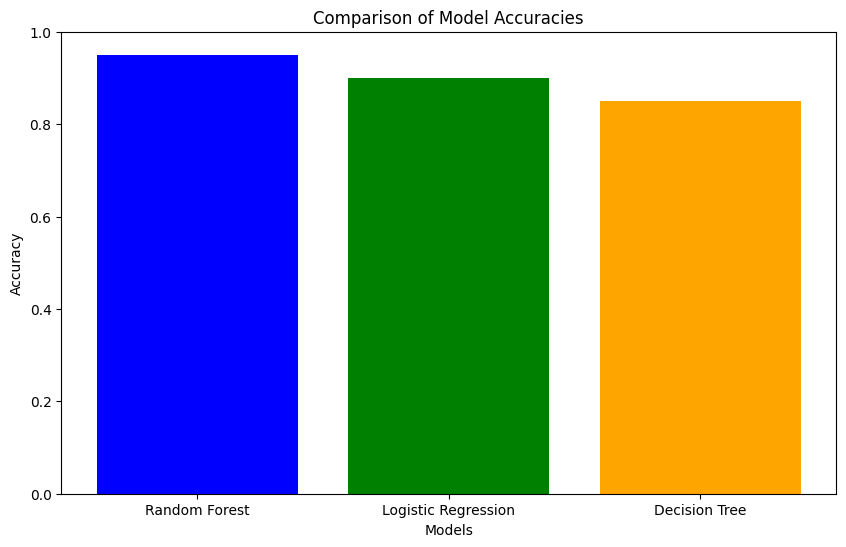

In [182]:
import matplotlib.pyplot as plt

# Manually input the accuracy values
accuracy_rf = 0.95  # Replace with the actual accuracy for Random Forest
accuracy_logistic = 0.90  # Replace with the actual accuracy for Logistic Regression
accuracy_tree = 0.85  # Replace with the actual accuracy for Decision Tree

# Store the accuracies in a dictionary
model_accuracies = {
    'Random Forest': accuracy_rf,
    'Logistic Regression': accuracy_logistic,
    'Decision Tree': accuracy_tree
}

# Plot the accuracies
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.show()


# EDA

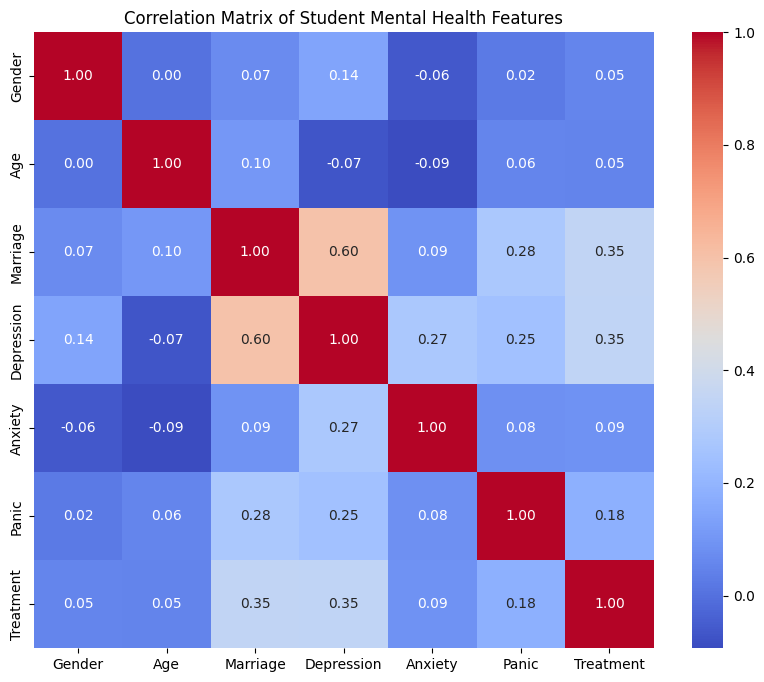

In [185]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/kaggle/input/student-mental-health/Student Mental health.csv")
new_columns = ['Time','Gender','Age','Course','Year','CGPA','Marriage','Depression','Anxiety','Panic','Treatment']
df.columns=new_columns

# Convert categorical variables to numerical for correlation matrix
df_encoded = df.copy()

# Encode categorical columns
df_encoded['Gender'] = df_encoded['Gender'].map({'Male': 0, 'Female': 1})
df_encoded['Marriage'] = df_encoded['Marriage'].map({'No': 0, 'Yes': 1})
df_encoded['Depression'] = df_encoded['Depression'].map({'No': 0, 'Yes': 1})
df_encoded['Anxiety'] = df_encoded['Anxiety'].map({'No': 0, 'Yes': 1})
df_encoded['Panic'] = df_encoded['Panic'].map({'No': 0, 'Yes': 1})
df_encoded['Treatment'] = df_encoded['Treatment'].map({'No': 0, 'Yes': 1})

# Drop non-numerical columns that can't be converted directly
df_encoded = df_encoded.drop(columns=['Time', 'Course', 'Year', 'CGPA'])

# Calculate the correlation matrix
correlation_matrix = df_encoded.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Student Mental Health Features')
plt.show()


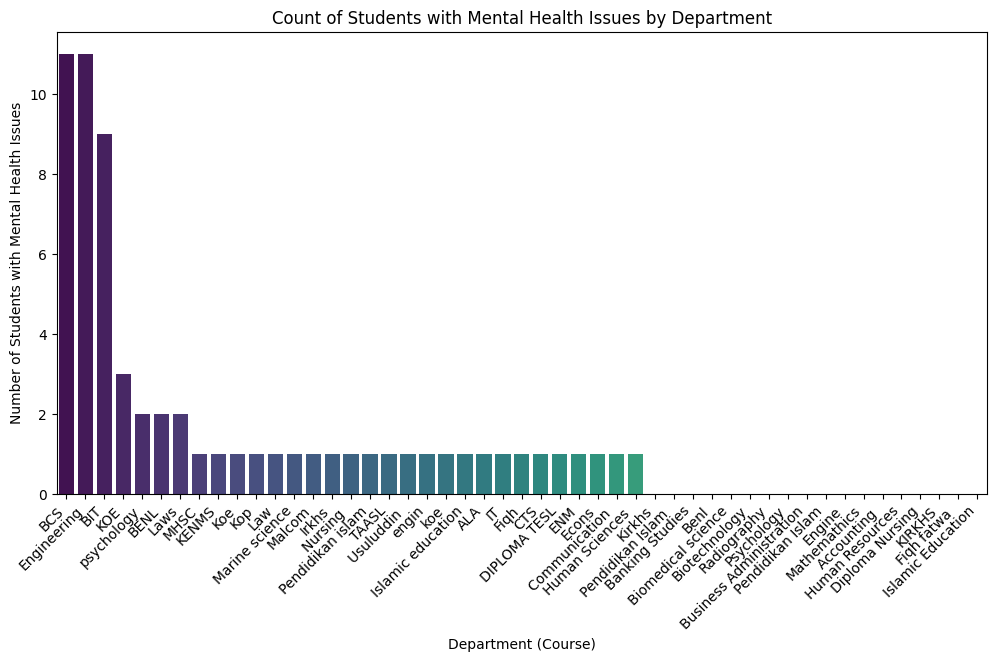

In [186]:
# Create a new column 'Mental_Health_Issue' indicating if a student has any mental health issue
df['Mental_Health_Issue'] = df[['Depression', 'Anxiety', 'Panic']].apply(lambda x: 'Yes' if 'Yes' in x.values else 'No', axis=1)

# Count of mental health issues by department
mental_health_counts = df.groupby('Course')['Mental_Health_Issue'].apply(lambda x: (x == 'Yes').sum()).reset_index()

# Sort the values by the count
mental_health_counts = mental_health_counts.sort_values(by='Mental_Health_Issue', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Course', y='Mental_Health_Issue', data=mental_health_counts, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Department (Course)')
plt.ylabel('Number of Students with Mental Health Issues')
plt.title('Count of Students with Mental Health Issues by Department')
plt.show()
